# Assignment8

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [66]:
df = pd.read_csv("https://raw.githubusercontent.com/Vsekar05/Datasets/main/car_data.csv")
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


# Descriptive Analysis

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [68]:
df.isna().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [69]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [70]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


# Explratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


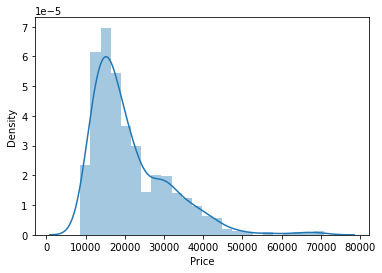

In [71]:
import seaborn as sns
sns.distplot(df["Price"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


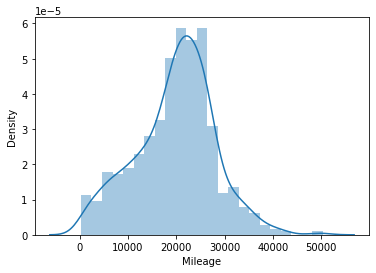

In [72]:
sns.distplot(df["Mileage"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


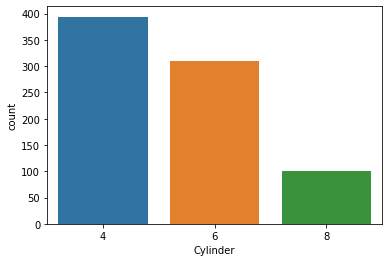

In [73]:
sns.countplot(df["Cylinder"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


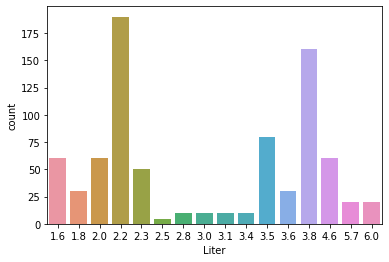

In [74]:
sns.countplot(df["Liter"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


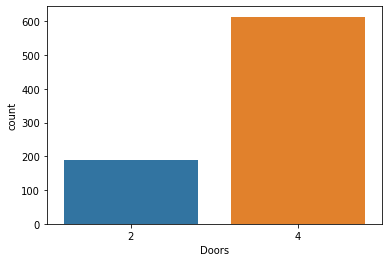

In [75]:
sns.countplot(df["Doors"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


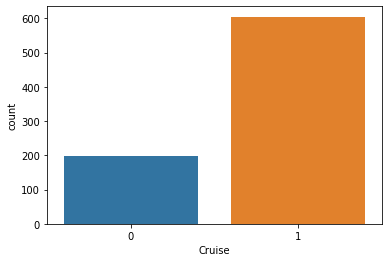

In [76]:
sns.countplot(df["Cruise"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


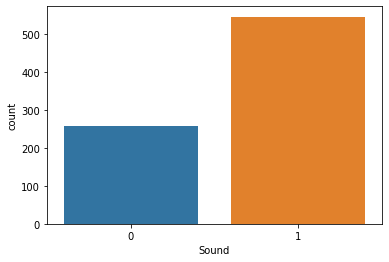

In [77]:
sns.countplot(df["Sound"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


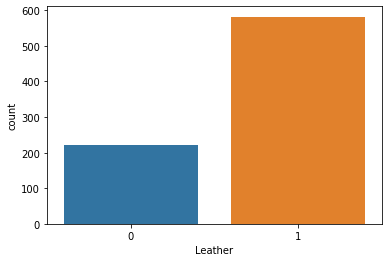

In [78]:
sns.countplot(df["Leather"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


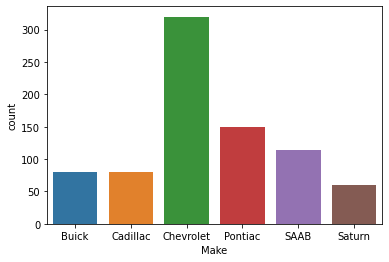

In [79]:
sns.countplot(df["Make"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


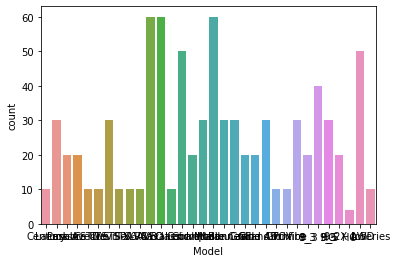

In [80]:
sns.countplot(df["Model"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


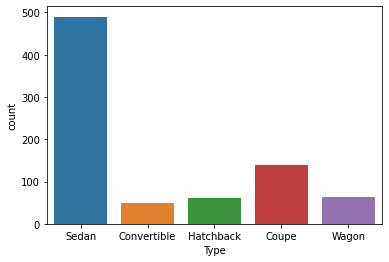

In [81]:
sns.countplot(df["Type"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


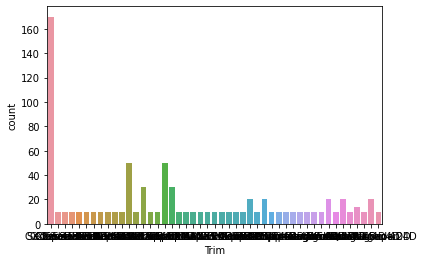

In [82]:
sns.countplot(df["Trim"])
plt.show()

# Task Part 1

Find the linear regression equation for mileage vs price.

In [83]:
X=df[["Mileage"]]
y=df["Price"]

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [85]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [86]:
print(model.intercept_)
print(model.coef_)

25581.391535102055
[-0.20364911]


In [87]:
y_pred = model.predict(X_test)
y_pred

array([20689.53621701, 20971.38658794, 21210.87794359, 22765.12796598,
       20944.09760694, 21466.05028086, 19902.22875022, 18602.54011777,
       24276.20437663, 25462.66410284, 20238.45343404, 21070.15640724,
       20824.35192912, 23967.67597203, 22031.58386474, 20696.05298859,
       20935.34069513, 22421.57191412, 21911.43088869, 21164.64959518,
       22624.20278051, 21119.43949233, 20189.37399806, 20741.26309144,
       20979.73620153, 19800.81149247, 20886.26125915, 20300.56641319,
       23228.42969566, 21569.70767884, 20476.92654413, 21709.20732053,
       20821.90813977, 22508.93738315, 20952.65086964, 22021.60505826,
       24372.53040658, 23671.16286503, 23142.69341953, 22275.14820263,
       23309.48204221, 25391.59056277, 21262.40116891, 20348.22030538,
       21602.29153676, 19592.07115272, 24972.07339215, 20126.03912425,
       20219.71771574, 20522.3402961 , 22668.3946378 , 21566.44929305,
       23502.13410212, 21863.36969827, 23881.9396959 , 24579.0306061 ,
      

Chart the original data and the equation on the chart

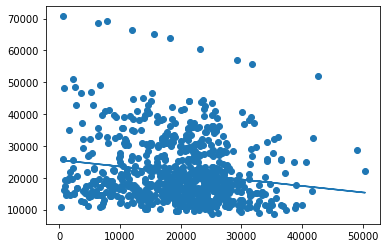

In [88]:
plt.scatter(X,y)
plt.plot(X,model.predict(X))

Find the equation's  R2  score

In [89]:
Score=model.score(X_train,y_train)
print(Score)

0.027542762715027647


The Score for this model is very less tha 0.8 there is not correlation between the values

# Part 2

Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation

In [90]:
X=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y=df["Price"]

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [92]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [93]:
print(model.intercept_)
print(model.coef_)

5646.931137899097
[-1.76691421e-01  3.49049625e+03 -1.84154495e+02 -1.26870328e+03
  6.30539132e+03 -2.00436670e+03  3.77474047e+03]


In [94]:
y_pred = model.predict(X_test)
y_pred

array([26780.04374972, 23120.93606341, 10410.65034107, 33281.27677065,
       14413.30310284, 20675.34558305,  9275.23126804, 16131.2744577 ,
       21053.89745407, 38159.13789426, 13801.06732816, 27514.4117245 ,
       24800.56952054, 22790.57665322, 21073.94041221, 22882.04926187,
       18210.52103687, 26149.52943842, 30248.6906881 , 10370.54138844,
        9669.35300134, 14565.43441654, 26272.42782095, 26696.01522395,
       23165.01131076, 23875.68753819, 18112.69205573, 23071.95437698,
       28853.94755183, 14533.55199098,  7806.31865555, 12650.21891217,
       33397.08398641, 19520.56930035, 25642.08701023, 22027.76702049,
       21592.08827908, 23539.38503137, 33608.86266567, 22247.74783996,
       14038.66010045, 22476.25215107, 17256.95355043, 24405.88042716,
       23723.5724351 , 17008.23352315, 30366.77950068, 15707.900366  ,
       24294.38814035, 16155.47886851, 15449.97130961, 21258.66340987,
       22938.11536897, 12673.48162084, 31958.35688024, 15029.66172337,
      

Find the equation's  R2  score

In [95]:
Score=model.score(X_train,y_train)
print(Score)

0.47191555755912684


The score for this model is lesser than 0.8 which means that there is no correlation between the values

Find the combination of the factors that is the best predictor for price

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [97]:
df["Price"]=df["Price"].astype("int64")

In [98]:
df["Liter"]=df["Liter"].astype("int64")

In [99]:
df["Make"].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [100]:
df["Make"]=df["Make"].map({"Buick":1,"Cadillac":2,"Chevrolet":3,"Pontiac":4,"SAAB":5,"Saturn":6})

In [101]:
df["Make"].unique()

array([1, 2, 3, 4, 5, 6])

In [102]:
df["Model"].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [103]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Model"]=label_encoder.fit_transform(df['Model'])

In [104]:
df["Model"].unique()

array([10, 22, 23, 26,  7,  8, 14, 27, 28, 31,  5,  9, 11, 12, 13, 19, 24,
       25,  6, 15, 17, 18, 16, 29, 30,  1,  2,  3,  4,  0, 20, 21])

In [105]:
df["Trim"].unique()

array(['Sedan 4D', 'CX Sedan 4D', 'CXL Sedan 4D', 'CXS Sedan 4D',
       'Custom Sedan 4D', 'Limited Sedan 4D', 'Special Ed Ultra 4D',
       'DHS Sedan 4D', 'DTS Sedan 4D', 'Hardtop Conv 2D',
       'LS Hatchback 4D', 'LS Sedan 4D', 'LT Hatchback 4D', 'LT Sedan 4D',
       'SVM Hatchback 4D', 'SVM Sedan 4D', 'Coupe 2D', 'LS Coupe 2D',
       'LS Sport Coupe 2D', 'LS Sport Sedan 4D', 'Conv 2D', 'SS Sedan 4D',
       'LS MAXX Hback 4D', 'LT MAXX Hback 4D', 'MAXX Hback 4D',
       'LT Coupe 2D', 'SS Coupe 2D', 'GXP Sedan 4D', 'SE Sedan 4D',
       'SLE Sedan 4D', 'GT Sedan 4D', 'GT Coupe 2D', 'GTP Sedan 4D',
       'AWD Sportwagon 4D', 'GT Sportwagon', 'Sportwagon 4D',
       'Linear Conv 2D', 'Linear Sedan 4D', 'Aero Conv 2D',
       'Aero Sedan 4D', 'Arc Conv 2D', 'Arc Sedan 4D', 'Arc Wagon 4D',
       'Linear Wagon 4D', 'Aero Wagon 4D', 'Quad Coupe 2D',
       'L300 Sedan 4D'], dtype=object)

In [106]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df["Trim"]=label_encoder.fit_transform(df['Trim'])

In [107]:
df["Type"].unique()

array(['Sedan', 'Convertible', 'Hatchback', 'Coupe', 'Wagon'],
      dtype=object)

In [108]:
df["Type"]=df["Type"].map({"Sedan":1,"Convertible":2,"Hatchback":3,"Coupe":4,"Wagon":5})

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Price     804 non-null    int64
 1   Mileage   804 non-null    int64
 2   Make      804 non-null    int64
 3   Model     804 non-null    int64
 4   Trim      804 non-null    int64
 5   Type      804 non-null    int64
 6   Cylinder  804 non-null    int64
 7   Liter     804 non-null    int64
 8   Doors     804 non-null    int64
 9   Cruise    804 non-null    int64
 10  Sound     804 non-null    int64
 11  Leather   804 non-null    int64
dtypes: int64(12)
memory usage: 75.5 KB


In [110]:
X=df.drop(columns=["Price"])
y=df["Price"]

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [112]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [113]:
print(model.intercept_)
print(model.coef_)

3961.105247250489
[-1.94385396e-01  6.81910496e+02 -1.69303212e+02 -7.63541450e+01
  5.96016602e-01  3.43434746e+03  1.16802101e+03 -6.43932101e+02
  4.78073389e+03 -1.34923196e+03  3.04212165e+03]


In [114]:
y_pred = model.predict(X_test)
y_pred

array([24278.94053787, 22197.15406771,  8472.58790952, 30582.05313439,
       14857.80816648, 24272.35790587,  8521.48781668, 19777.29638627,
       22918.84410438, 35769.93215752, 13222.34674308, 24628.6062641 ,
       23851.85652829, 26261.82246843, 22633.46985869, 21934.34501171,
       22416.5576062 , 27687.6714407 , 26780.84429335,  6214.19221994,
       10113.01476317, 15357.15995017, 27138.66148888, 23043.6224059 ,
       22230.92875086, 25262.47991875, 22031.10430066, 21310.02707438,
       29883.41248294, 14948.56953803,  8902.11870462, 13120.466385  ,
       34799.84810876, 23520.20791713, 22823.55620041, 18373.85626813,
       22186.28554024, 25359.50274266, 33312.68863441, 22041.8281562 ,
       15106.07170023, 22623.31901598, 18777.40384397, 23048.22342837,
       23307.26966342, 15378.57396258, 28609.06191691, 14464.27796074,
       22467.44137329, 14159.18275032, 10691.65563379, 19927.16724369,
       22080.21701691, 12949.2165537 , 29119.84225933, 15357.94966529,
      

In [115]:
Score=model.score(X_train,y_train)
print(Score)

0.5186172562971578


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Price     804 non-null    int64
 1   Mileage   804 non-null    int64
 2   Make      804 non-null    int64
 3   Model     804 non-null    int64
 4   Trim      804 non-null    int64
 5   Type      804 non-null    int64
 6   Cylinder  804 non-null    int64
 7   Liter     804 non-null    int64
 8   Doors     804 non-null    int64
 9   Cruise    804 non-null    int64
 10  Sound     804 non-null    int64
 11  Leather   804 non-null    int64
dtypes: int64(12)
memory usage: 75.5 KB


In [118]:
X=df[["Mileage"]]
y=df["Price"]

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [120]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [121]:
print(model.intercept_)
print(model.coef_)

25580.946567180472
[-0.20365025]


In [122]:
y_pred = model.predict(X_test)
y_pred

array([20689.0638266 , 20970.91577752, 21210.4084757 , 22764.66721081,
       20943.62664354, 21465.5822434 , 19901.75194637, 18602.0560282 ,
       24275.75209216, 25462.21846936, 20237.97851499, 21069.68615049,
       20823.88029446, 23967.22195803, 22031.11899751, 20695.58063472,
       20934.86968264, 22421.10923307, 21910.96534792, 21164.17986814,
       22623.74123535, 21118.96951185, 20188.89880388, 20740.79099101,
       20979.26543792, 19800.3341201 , 20885.78997154, 20300.09184232,
       23227.97153764, 21569.24022246, 20476.4529619 , 21708.74064614,
       20821.43649141, 22508.47519184, 20952.17995419, 22021.14013509,
       24372.07866209, 23670.70718886, 23142.23478089, 22274.68470076,
       23309.02433855, 25391.14453087, 21261.93198985, 20347.74600165,
       21601.82426302, 19591.59261021, 24971.62500855, 20125.56357503,
       20219.24269166, 20521.86696844, 22667.93334037, 21565.9818184 ,
       23501.67747841, 21862.90388808, 23881.48520129, 24578.5800192 ,
      

In [123]:
Score=model.score(X_train,y_train)
print(Score)

0.027543073964130138


There is no relation between Mileage and Price

In [130]:
X=df[["Make"]]
y=df["Price"]

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [132]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [133]:
print(model.intercept_)
print(model.coef_)

26030.085924856867
[-1346.99545632]


In [134]:
y_pred = model.predict(X_test)
y_pred

array([24683.09046853, 20642.10409957, 20642.10409957, 23336.09501221,
       21989.09955589, 19295.10864325, 20642.10409957, 19295.10864325,
       19295.10864325, 23336.09501221, 17948.11318692, 21989.09955589,
       24683.09046853, 19295.10864325, 19295.10864325, 20642.10409957,
       19295.10864325, 20642.10409957, 21989.09955589, 20642.10409957,
       21989.09955589, 21989.09955589, 20642.10409957, 24683.09046853,
       24683.09046853, 20642.10409957, 19295.10864325, 21989.09955589,
       20642.10409957, 21989.09955589, 21989.09955589, 21989.09955589,
       23336.09501221, 19295.10864325, 21989.09955589, 24683.09046853,
       21989.09955589, 20642.10409957, 23336.09501221, 24683.09046853,
       21989.09955589, 21989.09955589, 19295.10864325, 21989.09955589,
       20642.10409957, 21989.09955589, 24683.09046853, 17948.11318692,
       21989.09955589, 21989.09955589, 20642.10409957, 21989.09955589,
       21989.09955589, 17948.11318692, 21989.09955589, 21989.09955589,
      

In [135]:
Score=model.score(X_train,y_train)
print(Score)

0.0318569531762779


There is no relation

In [136]:
X=df[["Model"]]
y=df["Price"]

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [138]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [139]:
print(model.intercept_)
print(model.coef_)

21845.714103736496
[-27.75650973]


In [140]:
y_pred = model.predict(X_test)
y_pred

array([21568.14900647, 21346.09692866, 21013.01881193, 21068.53183139,
       21595.9055162 , 21790.20108428, 21013.01881193, 21734.68806483,
       21762.44457456, 20985.26230221, 21290.5839092 , 21151.80136057,
       21235.07088975, 21762.44457456, 21845.71410374, 21346.09692866,
       21790.20108428, 21679.17504538, 21151.80136057, 21013.01881193,
       21706.9315551 , 21512.63598702, 21429.36645784, 21207.31438002,
       21235.07088975, 21679.17504538, 21734.68806483, 21151.80136057,
       21679.17504538, 21706.9315551 , 21706.9315551 , 21706.9315551 ,
       21651.41853565, 21762.44457456, 21151.80136057, 21124.04485084,
       21179.5578703 , 21373.85343838, 21457.12296756, 21235.07088975,
       21706.9315551 , 21179.5578703 , 21817.95759401, 21179.5578703 ,
       21429.36645784, 21595.9055162 , 21207.31438002, 21290.5839092 ,
       21179.5578703 , 21706.9315551 , 21013.01881193, 21595.9055162 ,
       21595.9055162 , 21290.5839092 , 21151.80136057, 21595.9055162 ,
      

In [141]:
Score=model.score(X_train,y_train)
print(Score)

0.000559743003604618


There is no relation

In [142]:
X=df[["Trim"]]
y=df["Price"]

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [144]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [145]:
print(model.intercept_)
print(model.coef_)

24886.27241251363
[-127.31353613]


In [146]:
y_pred = model.predict(X_test)
y_pred

array([19284.4768229 , 19284.4768229 , 22721.94229834, 19284.4768229 ,
       22085.37461771, 24631.64534026, 24886.27241251, 24504.33180413,
       20430.29864805, 22340.00168996, 20175.67157579, 21321.49340094,
       23995.07765962, 24249.70473188, 20430.29864805, 19284.4768229 ,
       24631.64534026, 19921.04450353, 21321.49340094, 19029.84975064,
       19539.10389515, 23485.82351511, 22849.25583447, 20812.23925643,
       23867.76412349, 20048.35803966, 24631.64534026, 22085.37461771,
       20048.35803966, 21958.06108158, 20939.55279256, 20939.55279256,
       19284.4768229 , 24249.70473188, 21321.49340094, 19157.16328677,
       21830.74754545, 22976.5693706 , 19284.4768229 , 23740.45058736,
       21703.43400932, 20939.55279256, 20684.9257203 , 21703.43400932,
       19284.4768229 , 19284.4768229 , 23358.50997898, 20175.67157579,
       20939.55279256, 19411.79035902, 19029.84975064, 21576.12047319,
       22085.37461771, 19284.4768229 , 22085.37461771, 19284.4768229 ,
      

In [147]:
Score=model.score(X_train,y_train)
print(Score)

0.032772904699508


Ther is no Relation

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Price     804 non-null    int64
 1   Mileage   804 non-null    int64
 2   Make      804 non-null    int64
 3   Model     804 non-null    int64
 4   Trim      804 non-null    int64
 5   Type      804 non-null    int64
 6   Cylinder  804 non-null    int64
 7   Liter     804 non-null    int64
 8   Doors     804 non-null    int64
 9   Cruise    804 non-null    int64
 10  Sound     804 non-null    int64
 11  Leather   804 non-null    int64
dtypes: int64(12)
memory usage: 75.5 KB


In [148]:
X=df[["Type"]]
y=df["Price"]

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [150]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [151]:
print(model.intercept_)
print(model.coef_)

22747.68352607041
[-640.72992324]


In [152]:
y_pred = model.predict(X_test)
y_pred

array([22106.95360283, 22106.95360283, 19544.03390986, 22106.95360283,
       20184.7638331 , 22106.95360283, 19544.03390986, 19544.03390986,
       19544.03390986, 21466.22367959, 20184.7638331 , 20184.7638331 ,
       22106.95360283, 22106.95360283, 19544.03390986, 22106.95360283,
       22106.95360283, 22106.95360283, 20184.7638331 , 19544.03390986,
       20825.49375634, 20184.7638331 , 22106.95360283, 22106.95360283,
       22106.95360283, 22106.95360283, 22106.95360283, 20184.7638331 ,
       22106.95360283, 20825.49375634, 22106.95360283, 22106.95360283,
       22106.95360283, 22106.95360283, 20184.7638331 , 22106.95360283,
       20825.49375634, 20184.7638331 , 22106.95360283, 22106.95360283,
       22106.95360283, 22106.95360283, 21466.22367959, 22106.95360283,
       22106.95360283, 22106.95360283, 22106.95360283, 20184.7638331 ,
       22106.95360283, 22106.95360283, 19544.03390986, 20184.7638331 ,
       20184.7638331 , 22106.95360283, 20184.7638331 , 22106.95360283,
      

In [153]:
Score=model.score(X_train,y_train)
print(Score)

0.008452289429336846


There is no relation

In [155]:
X=df[["Cylinder"]]
y=df["Price"]

In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [157]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [158]:
print(model.intercept_)
print(model.coef_)

-1050.498394776132
[4260.65343825]


In [159]:
y_pred = model.predict(X_test)
y_pred

array([24513.42223475, 24513.42223475, 15992.11535824, 33034.72911126,
       15992.11535824, 15992.11535824, 15992.11535824, 15992.11535824,
       15992.11535824, 33034.72911126, 15992.11535824, 24513.42223475,
       24513.42223475, 15992.11535824, 15992.11535824, 24513.42223475,
       15992.11535824, 24513.42223475, 24513.42223475, 15992.11535824,
       15992.11535824, 15992.11535824, 24513.42223475, 24513.42223475,
       24513.42223475, 24513.42223475, 15992.11535824, 24513.42223475,
       24513.42223475, 15992.11535824, 15992.11535824, 15992.11535824,
       33034.72911126, 15992.11535824, 24513.42223475, 24513.42223475,
       24513.42223475, 24513.42223475, 33034.72911126, 24513.42223475,
       15992.11535824, 24513.42223475, 15992.11535824, 24513.42223475,
       24513.42223475, 15992.11535824, 24513.42223475, 15992.11535824,
       24513.42223475, 15992.11535824, 15992.11535824, 15992.11535824,
       15992.11535824, 15992.11535824, 24513.42223475, 15992.11535824,
      

In [160]:
Score=model.score(X_train,y_train)
print(Score)

0.3518843377635479


In [161]:
X=df[["Doors"]]
y=df["Price"]

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [163]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [164]:
print(model.intercept_)
print(model.coef_)

26111.69105720824
[-1315.3415286]


In [165]:
y_pred = model.predict(X_test)
y_pred

array([20850.32494279, 20850.32494279, 20850.32494279, 20850.32494279,
       23481.008     , 20850.32494279, 20850.32494279, 20850.32494279,
       20850.32494279, 23481.008     , 23481.008     , 23481.008     ,
       20850.32494279, 20850.32494279, 20850.32494279, 20850.32494279,
       20850.32494279, 20850.32494279, 23481.008     , 20850.32494279,
       20850.32494279, 23481.008     , 20850.32494279, 20850.32494279,
       20850.32494279, 20850.32494279, 20850.32494279, 23481.008     ,
       20850.32494279, 20850.32494279, 20850.32494279, 20850.32494279,
       20850.32494279, 20850.32494279, 23481.008     , 20850.32494279,
       20850.32494279, 23481.008     , 20850.32494279, 20850.32494279,
       20850.32494279, 20850.32494279, 23481.008     , 20850.32494279,
       20850.32494279, 20850.32494279, 20850.32494279, 23481.008     ,
       20850.32494279, 20850.32494279, 20850.32494279, 23481.008     ,
       23481.008     , 20850.32494279, 23481.008     , 20850.32494279,
      

In [166]:
Score=model.score(X_train,y_train)
print(Score)

0.011739346158630037


In [167]:
X=df[["Cruise"]]
y=df["Price"]

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [169]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [170]:
print(model.intercept_)
print(model.coef_)

13704.535714285716
[10295.66096818]


In [171]:
y_pred = model.predict(X_test)
y_pred

array([24000.19668246, 24000.19668246, 13704.53571429, 24000.19668246,
       13704.53571429, 24000.19668246, 13704.53571429, 24000.19668246,
       24000.19668246, 24000.19668246, 13704.53571429, 24000.19668246,
       24000.19668246, 24000.19668246, 24000.19668246, 24000.19668246,
       24000.19668246, 24000.19668246, 24000.19668246, 13704.53571429,
       13704.53571429, 13704.53571429, 24000.19668246, 24000.19668246,
       24000.19668246, 24000.19668246, 24000.19668246, 24000.19668246,
       24000.19668246, 13704.53571429, 13704.53571429, 13704.53571429,
       24000.19668246, 24000.19668246, 24000.19668246, 24000.19668246,
       13704.53571429, 13704.53571429, 24000.19668246, 24000.19668246,
       13704.53571429, 13704.53571429, 24000.19668246, 24000.19668246,
       24000.19668246, 24000.19668246, 24000.19668246, 13704.53571429,
       24000.19668246, 24000.19668246, 13704.53571429, 24000.19668246,
       24000.19668246, 13704.53571429, 24000.19668246, 13704.53571429,
      

In [172]:
Score=model.score(X_train,y_train)
print(Score)

0.19447525786622644


In [173]:
X=df[["Sound"]]
y=df["Price"]

In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [175]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [176]:
print(model.intercept_)
print(model.coef_)

22993.102857142854
[-2262.03050572]


In [177]:
y_pred = model.predict(X_test)
y_pred

array([22993.10285714, 22993.10285714, 22993.10285714, 20731.07235142,
       20731.07235142, 22993.10285714, 22993.10285714, 20731.07235142,
       20731.07235142, 20731.07235142, 20731.07235142, 20731.07235142,
       20731.07235142, 22993.10285714, 22993.10285714, 22993.10285714,
       20731.07235142, 20731.07235142, 22993.10285714, 22993.10285714,
       20731.07235142, 20731.07235142, 22993.10285714, 22993.10285714,
       22993.10285714, 20731.07235142, 20731.07235142, 20731.07235142,
       22993.10285714, 22993.10285714, 20731.07235142, 20731.07235142,
       22993.10285714, 20731.07235142, 22993.10285714, 20731.07235142,
       20731.07235142, 20731.07235142, 20731.07235142, 20731.07235142,
       20731.07235142, 20731.07235142, 20731.07235142, 20731.07235142,
       22993.10285714, 20731.07235142, 22993.10285714, 22993.10285714,
       20731.07235142, 22993.10285714, 22993.10285714, 20731.07235142,
       20731.07235142, 20731.07235142, 22993.10285714, 20731.07235142,
      

In [178]:
Score=model.score(X_train,y_train)
print(Score)

0.010761215590043616


In [179]:
X=df[["Leather"]]
y=df["Price"]

In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [181]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [182]:
print(model.intercept_)
print(model.coef_)

18486.76073619632
[4153.27936405]


In [183]:
y_pred = model.predict(X_test)
y_pred

array([22640.04010025, 18486.7607362 , 18486.7607362 , 22640.04010025,
       22640.04010025, 22640.04010025, 18486.7607362 , 22640.04010025,
       22640.04010025, 22640.04010025, 22640.04010025, 22640.04010025,
       22640.04010025, 22640.04010025, 22640.04010025, 18486.7607362 ,
       22640.04010025, 22640.04010025, 22640.04010025, 18486.7607362 ,
       18486.7607362 , 22640.04010025, 22640.04010025, 22640.04010025,
       18486.7607362 , 22640.04010025, 22640.04010025, 18486.7607362 ,
       22640.04010025, 22640.04010025, 18486.7607362 , 22640.04010025,
       22640.04010025, 22640.04010025, 18486.7607362 , 18486.7607362 ,
       22640.04010025, 22640.04010025, 22640.04010025, 18486.7607362 ,
       22640.04010025, 22640.04010025, 18486.7607362 , 22640.04010025,
       18486.7607362 , 22640.04010025, 22640.04010025, 22640.04010025,
       22640.04010025, 18486.7607362 , 22640.04010025, 22640.04010025,
       22640.04010025, 22640.04010025, 22640.04010025, 22640.04010025,
      

In [184]:
Score=model.score(X_train,y_train)
print(Score)

0.03483839925758725


Seems Like we need to use all the column expect price to predict the price

# Part 3

Research dummy variables in scikit-learn to see how to use the make, model, and body type.

Label encoding Make,Model and Body type produces the best model